**1. Import libraries**

In [121]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**2. Dataset**

In [122]:
#Read dataset

df=pd.read_csv('sample_data/employee.csv')

print(df.shape)
print(df.info())
print(df.columns)
print(df.head())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

**3. Preprocessing**

In [108]:
#Obtain sublevels per column

cols = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for col in cols:
    print(f'Columna {col}: {df[col].nunique()} sublevels')


Columna Age: 43 sublevels
Columna Attrition: 2 sublevels
Columna BusinessTravel: 3 sublevels
Columna DailyRate: 886 sublevels
Columna Department: 3 sublevels
Columna DistanceFromHome: 29 sublevels
Columna Education: 5 sublevels
Columna EducationField: 6 sublevels
Columna EmployeeCount: 1 sublevels
Columna EmployeeNumber: 1470 sublevels
Columna EnvironmentSatisfaction: 4 sublevels
Columna Gender: 2 sublevels
Columna HourlyRate: 71 sublevels
Columna JobInvolvement: 4 sublevels
Columna JobLevel: 5 sublevels
Columna JobRole: 9 sublevels
Columna JobSatisfaction: 4 sublevels
Columna MaritalStatus: 3 sublevels
Columna MonthlyIncome: 1349 sublevels
Columna MonthlyRate: 1427 sublevels
Columna NumCompaniesWorked: 10 sublevels
Columna Over18: 1 sublevels
Columna OverTime: 2 sublevels
Columna PercentSalaryHike: 15 sublevels
Columna PerformanceRating: 2 sublevels
Columna RelationshipSatisfaction: 4 sublevels
Columna StandardHours: 1 sublevels
Columna StockOptionLevel: 4 sublevels
Columna TotalWorki

In [109]:
#Statistical info for numeric columns

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


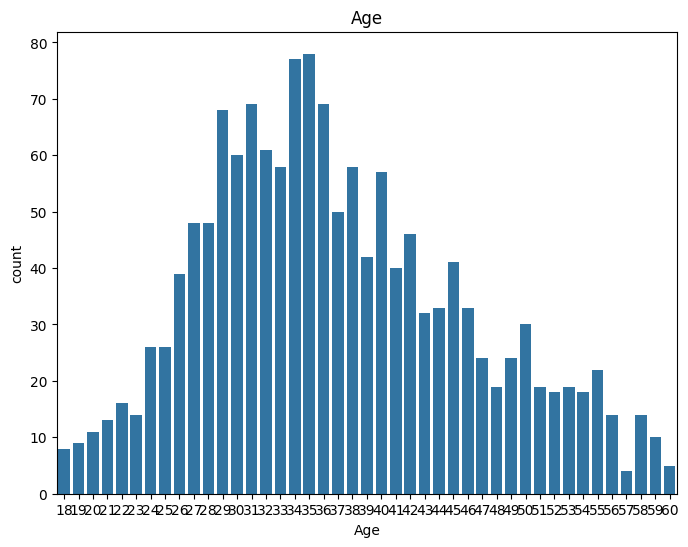

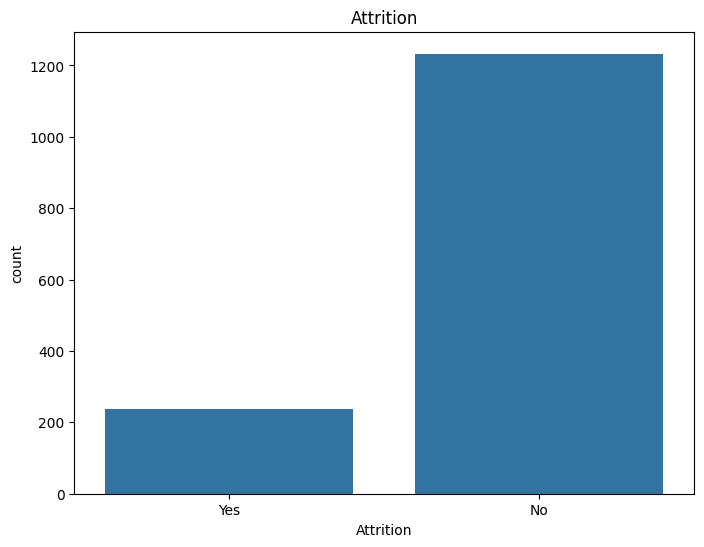

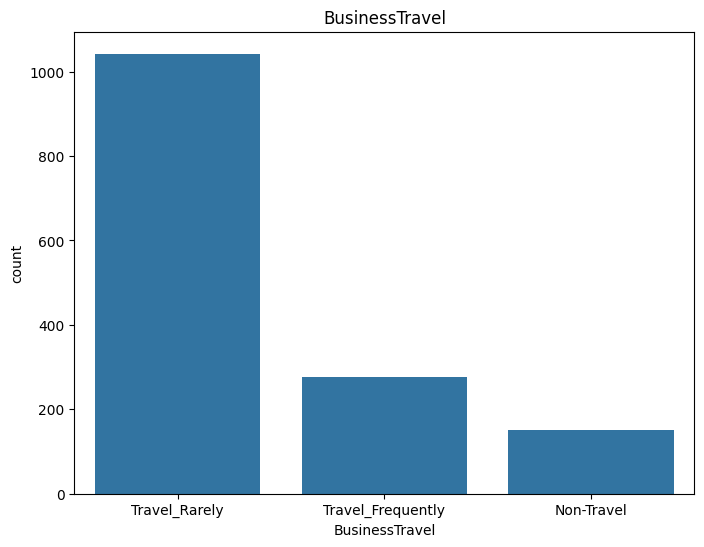

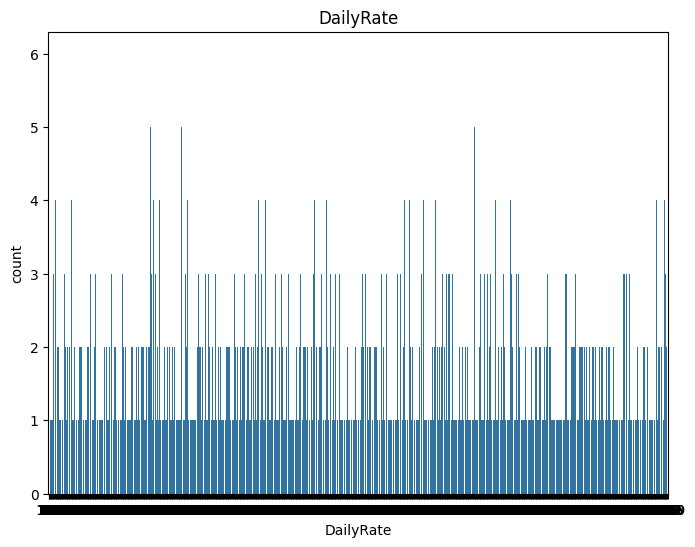

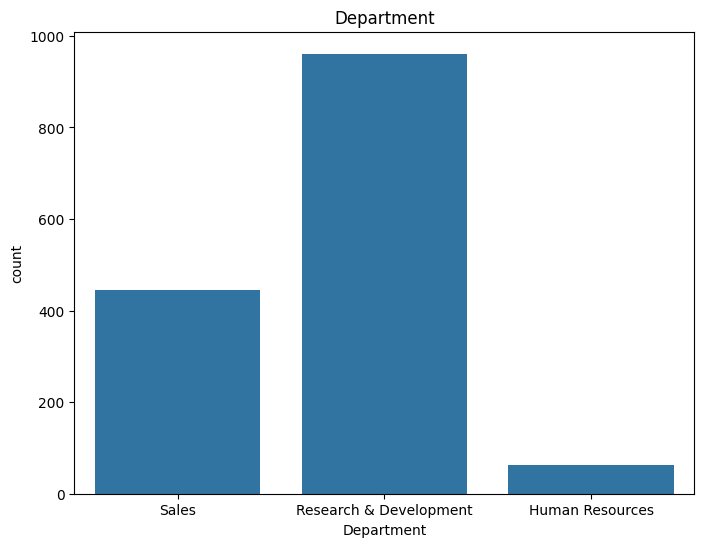

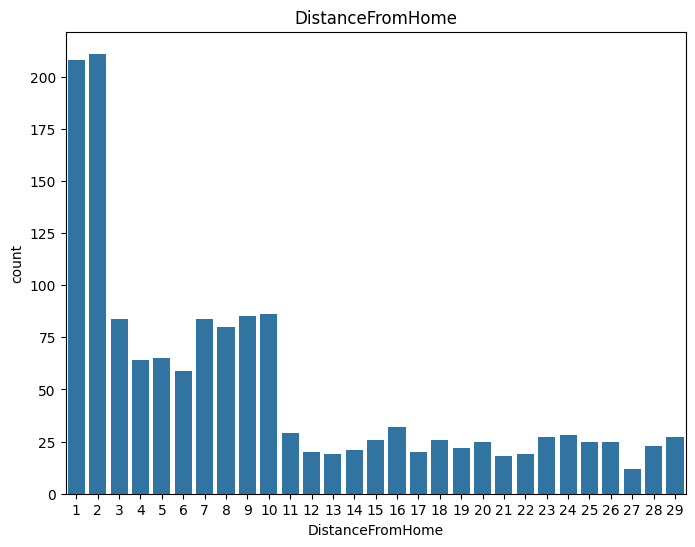

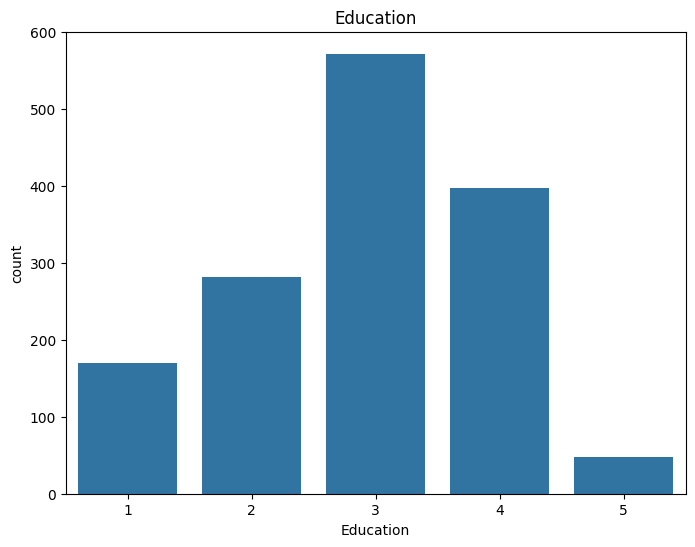

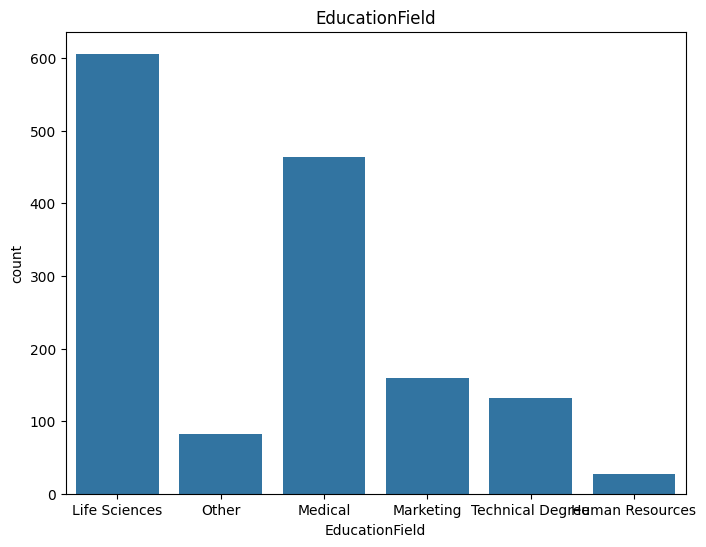

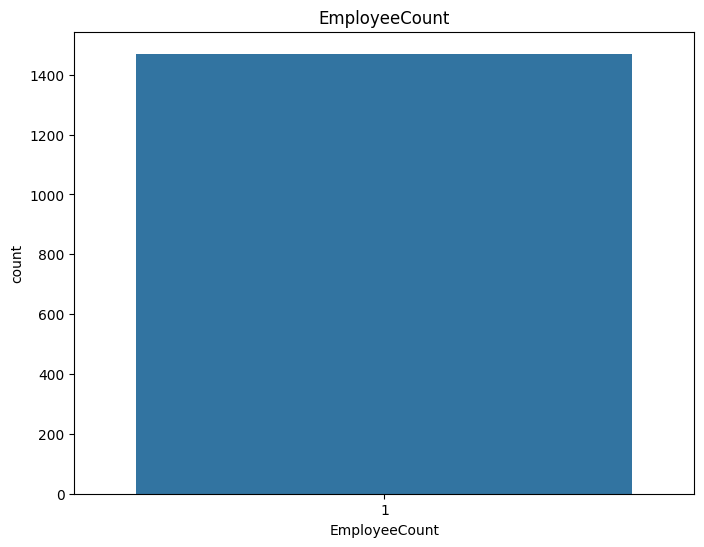

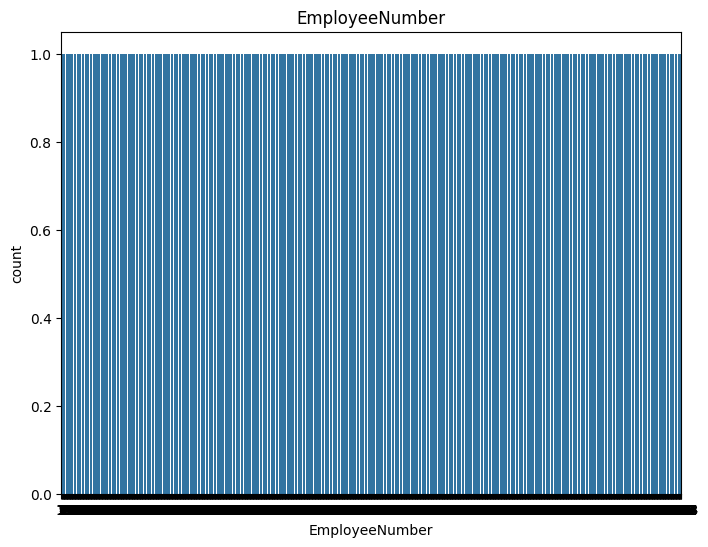

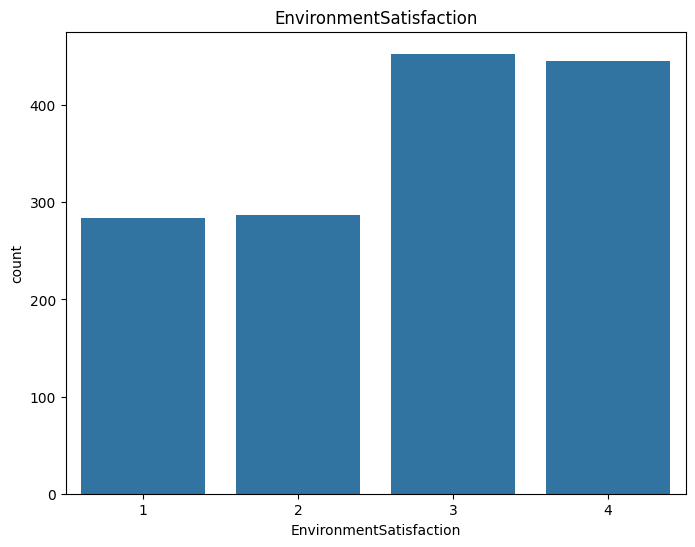

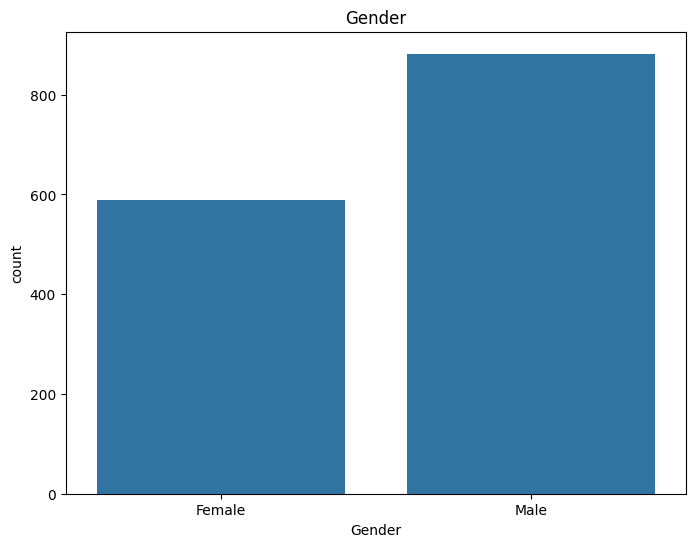

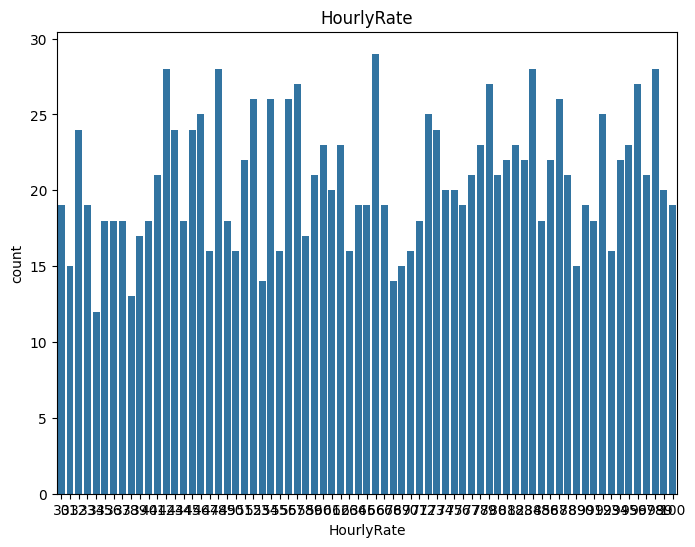

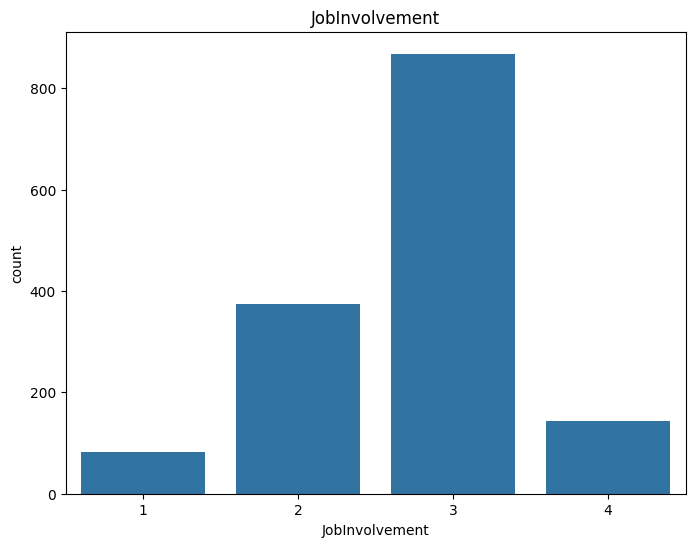

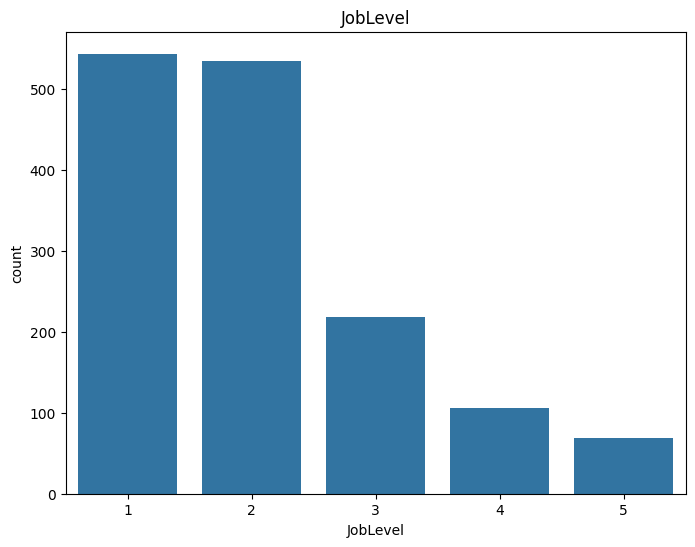

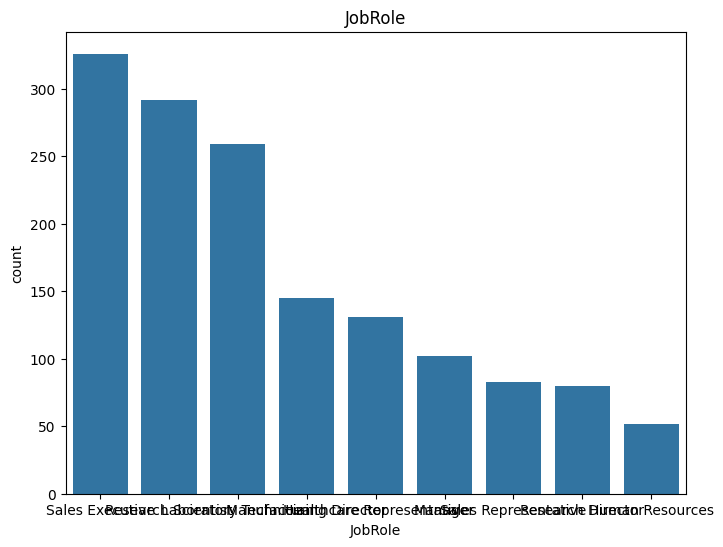

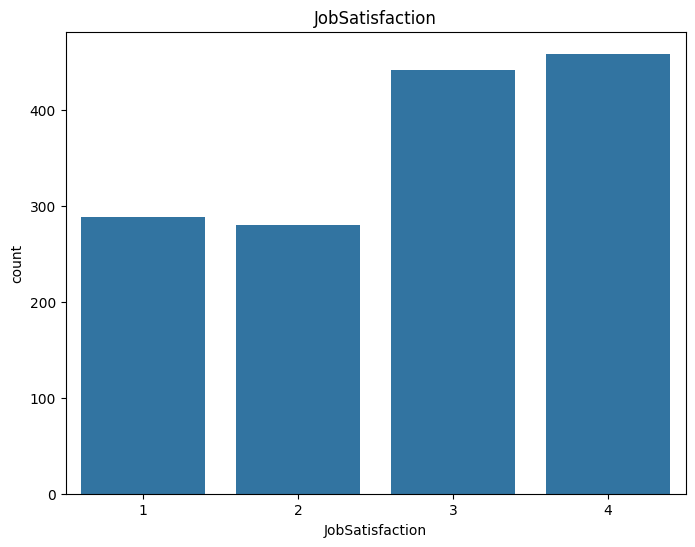

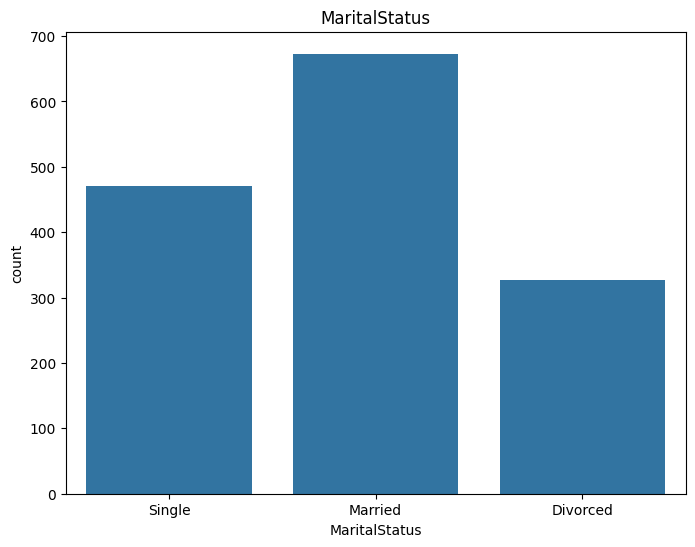

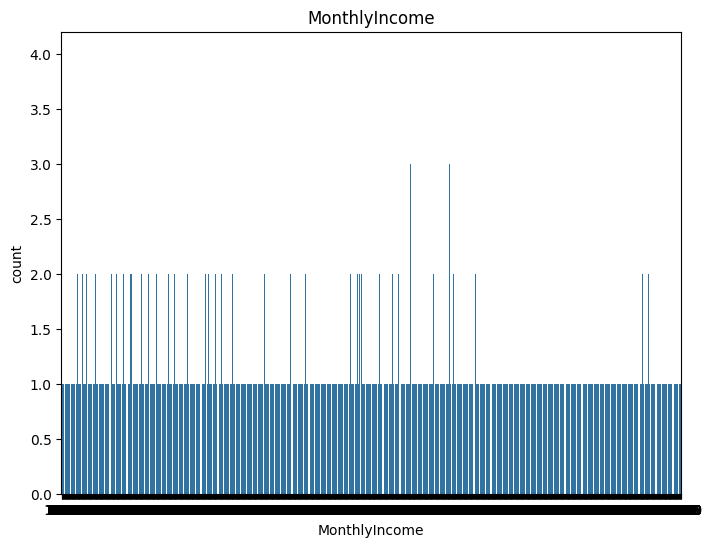

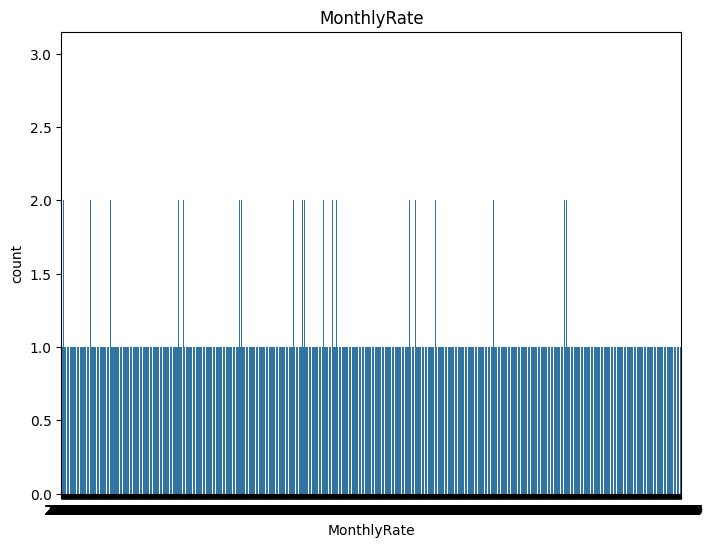

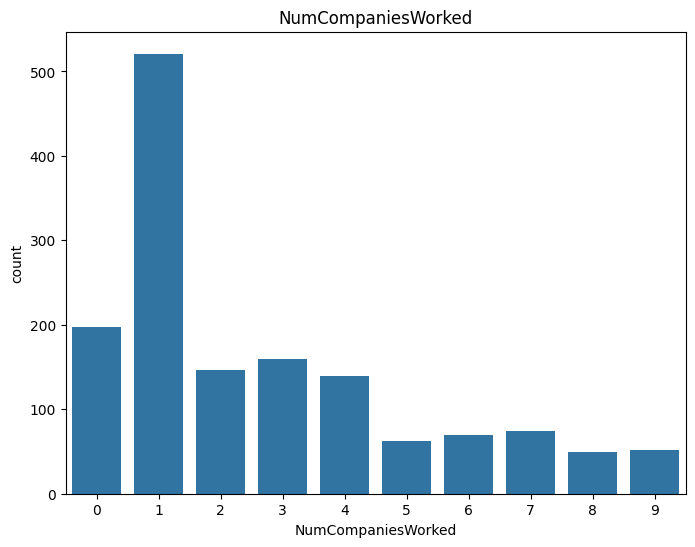

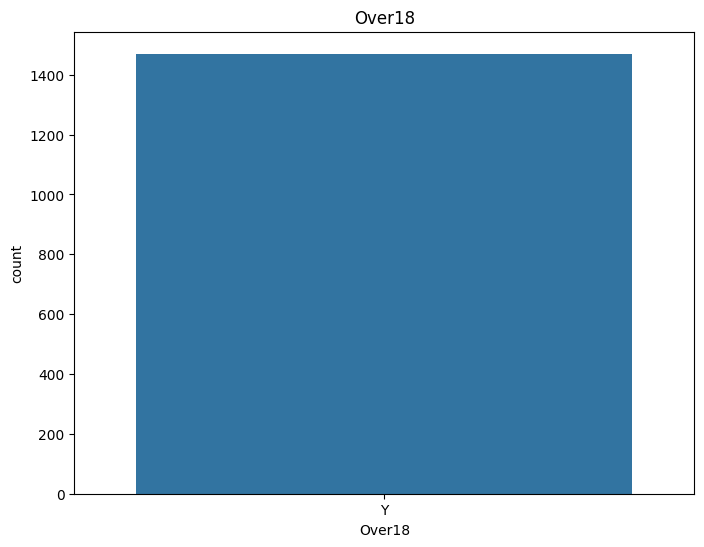

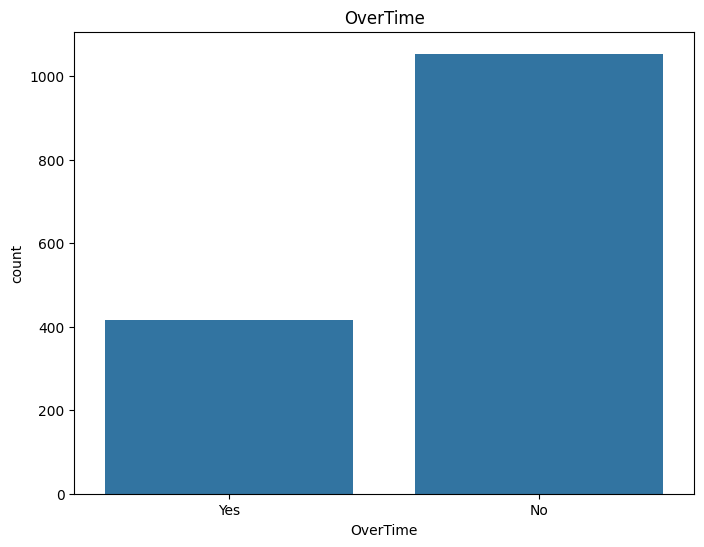

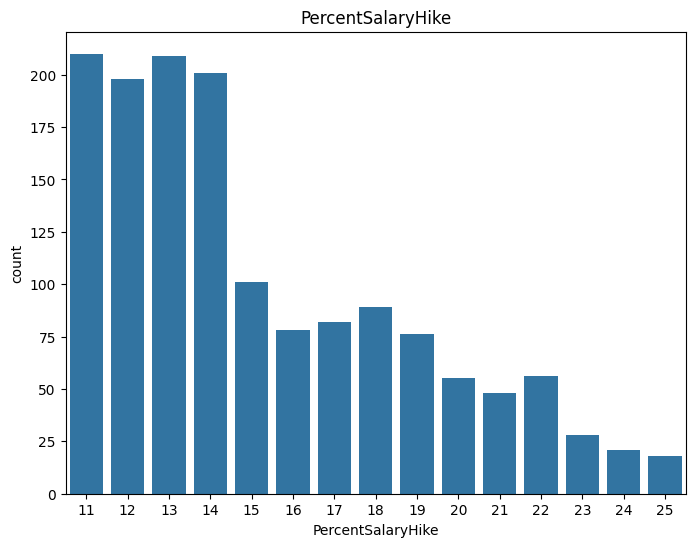

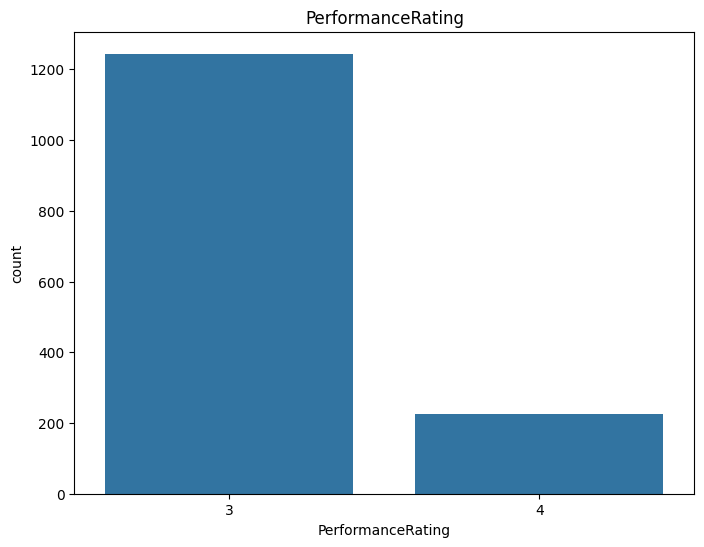

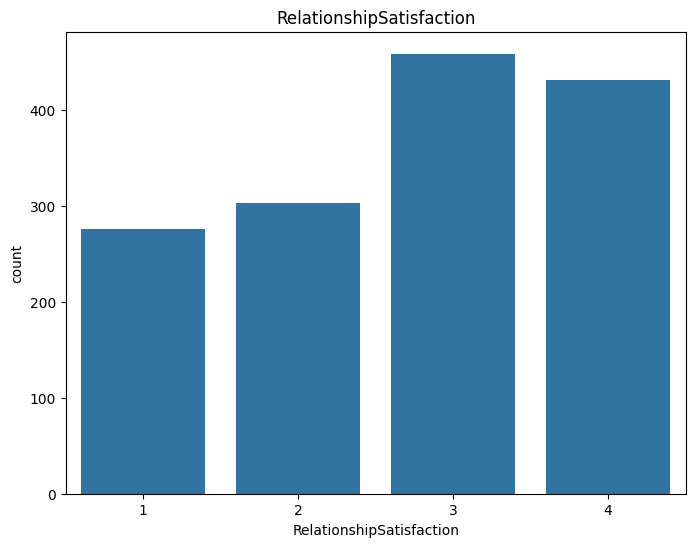

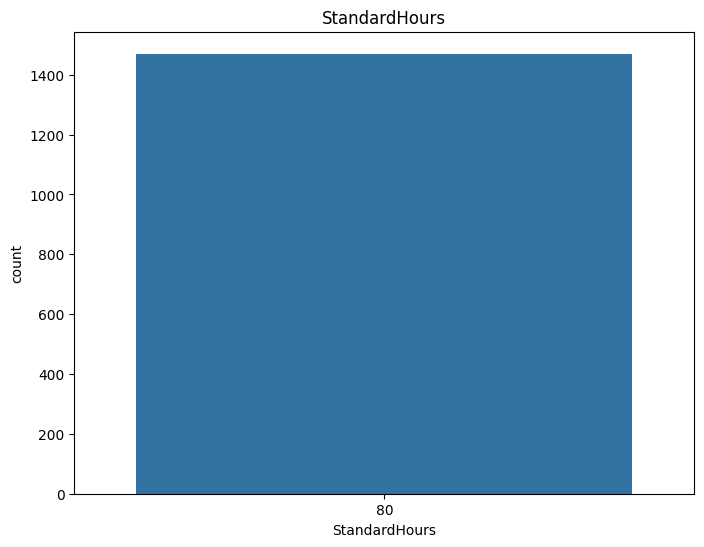

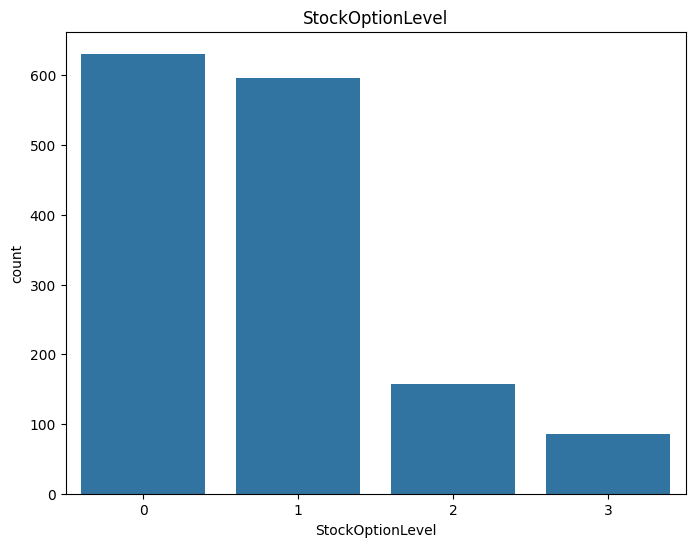

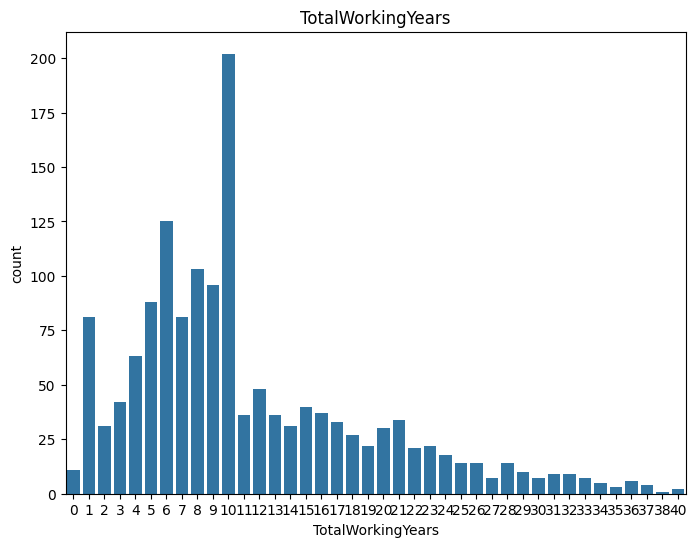

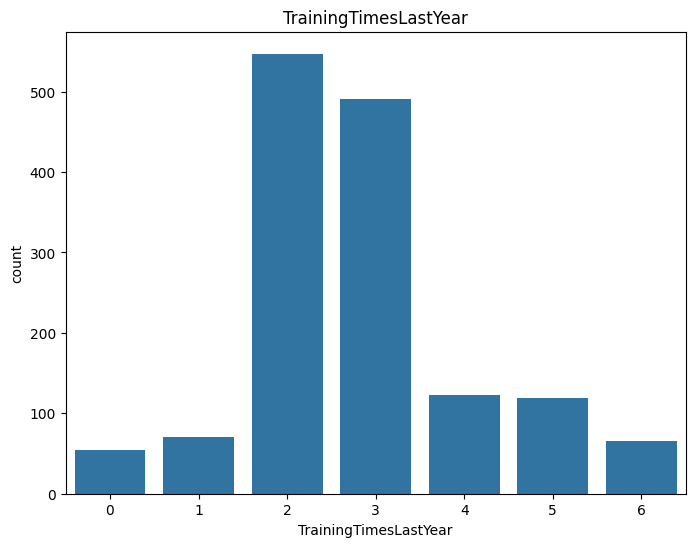

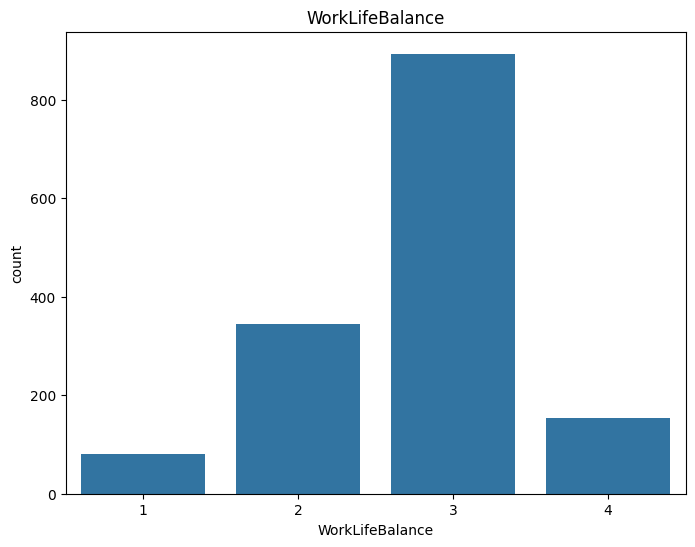

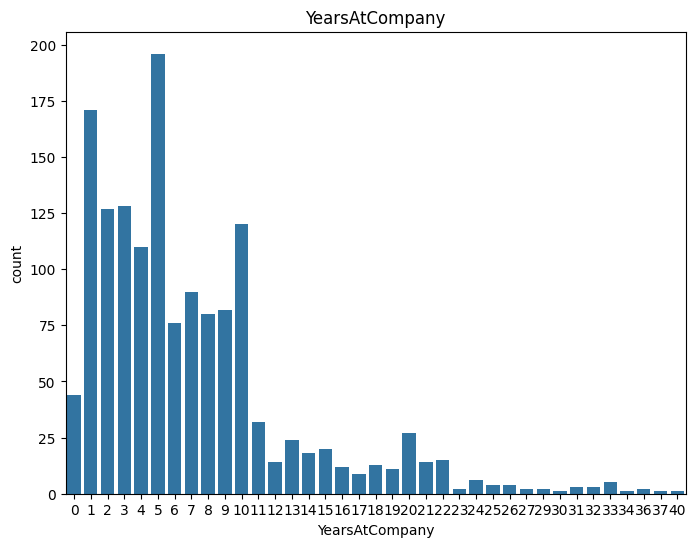

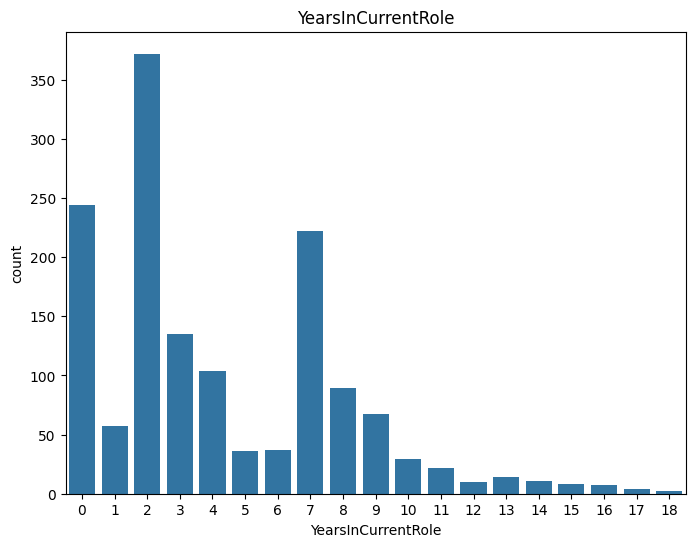

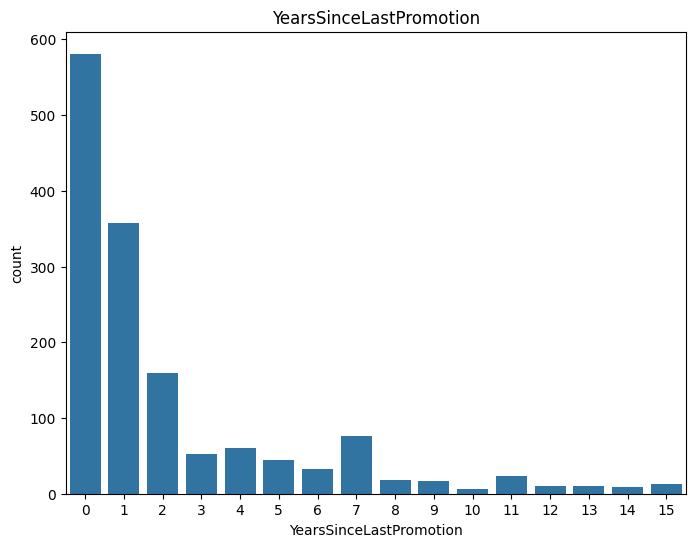

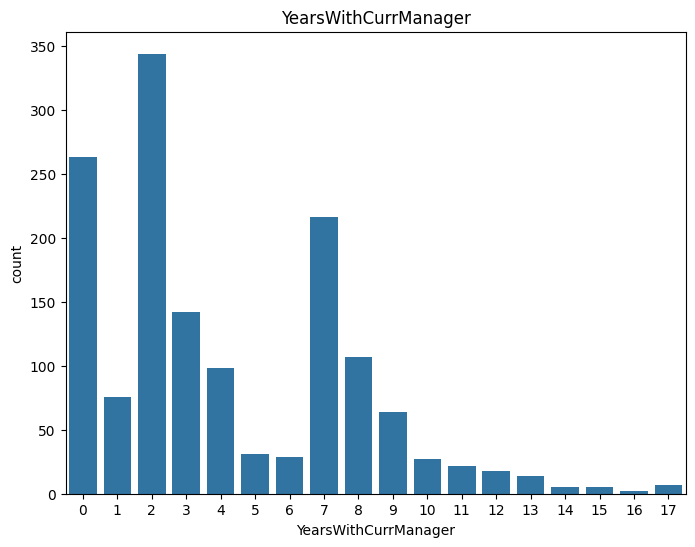

In [6]:
#Graph each column to analyse the data better

columns = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for column in columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=df)
  plt.title(column)
  plt.show()

In [123]:
#We are going to delete some columns after this considerations:

#EmployeeCount - Only one category, doesnot add value
#EmployeeNumber - Unique value per employee, doesnot add value
#Over18 - Only one category, doesnot add value
#StandardHours - Only one category, doesnot add value

df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [111]:
#Check new size of the dataframe

print(df.shape)

(1470, 31)


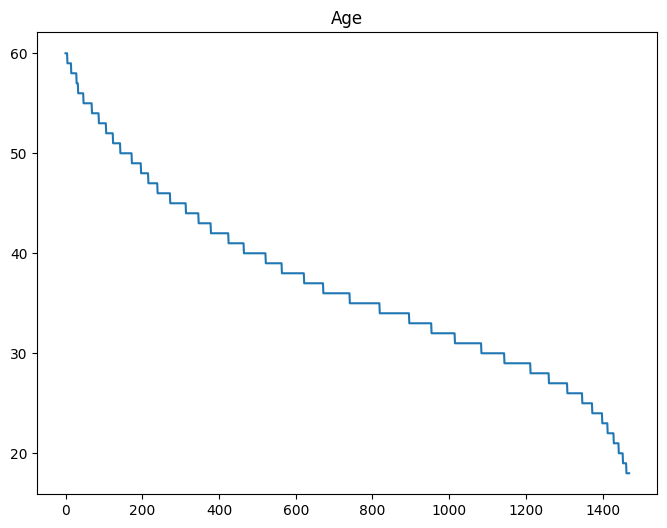

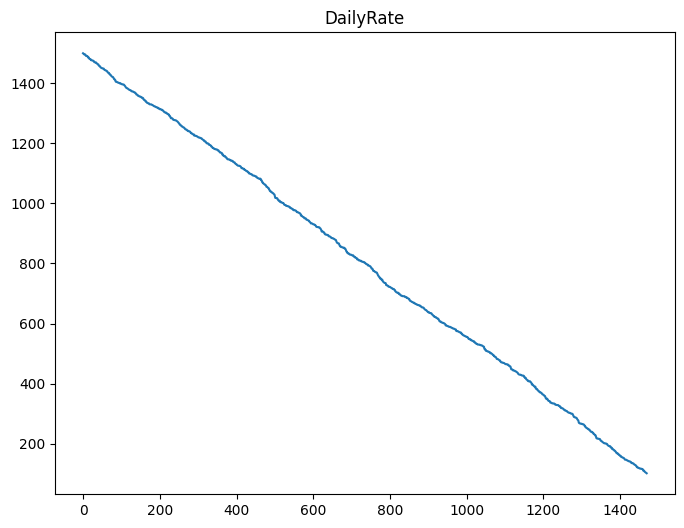

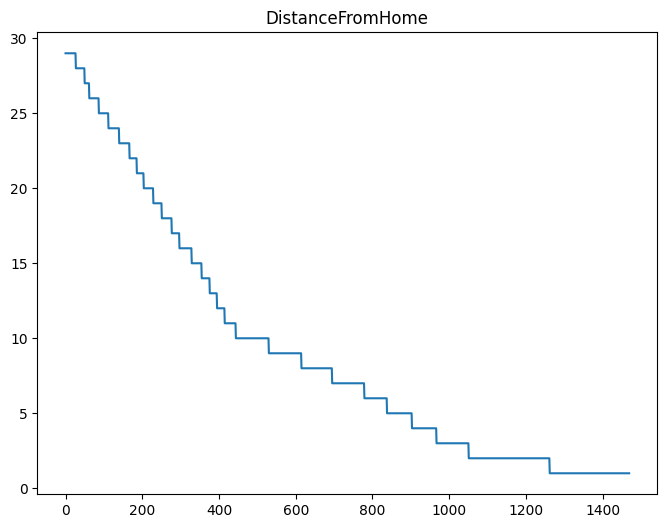

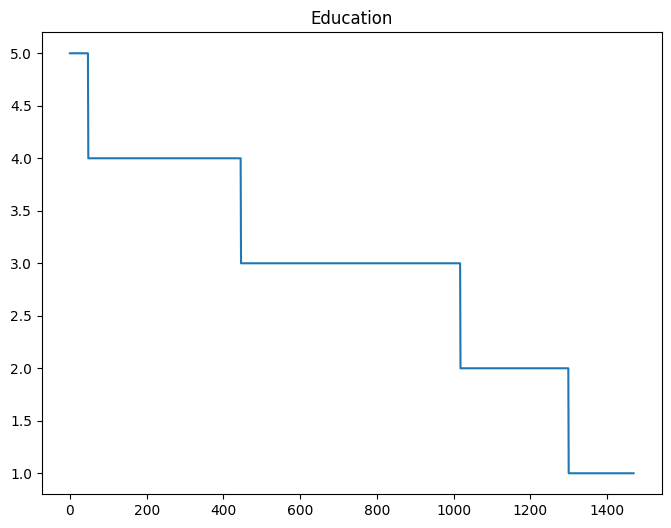

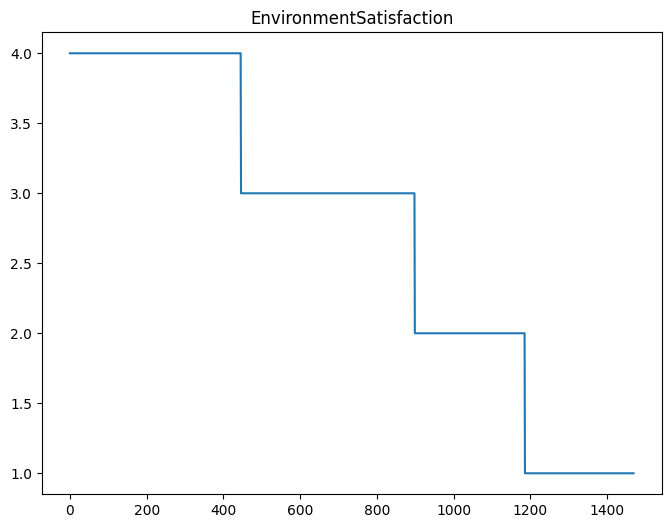

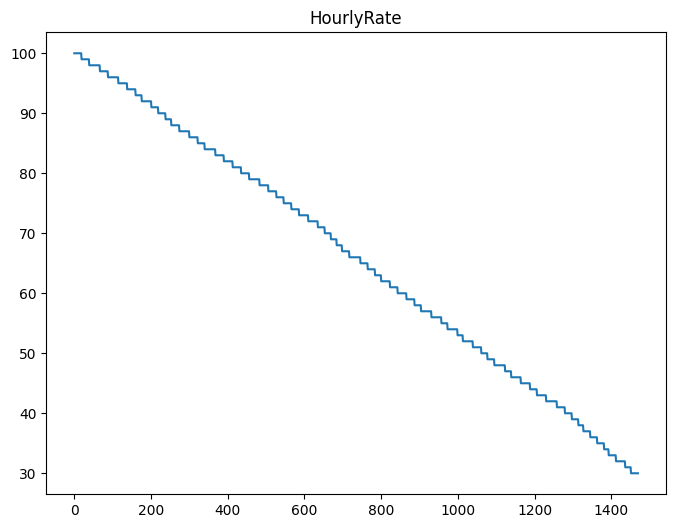

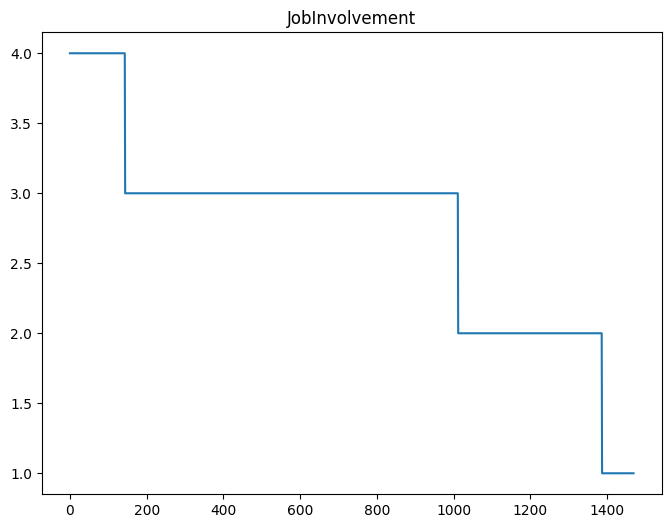

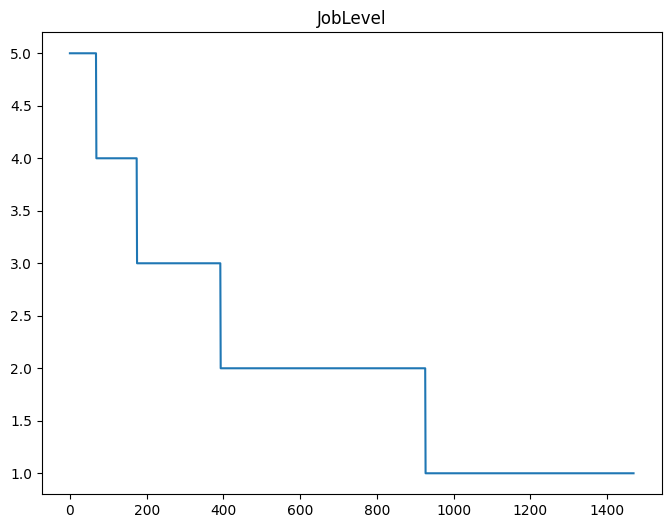

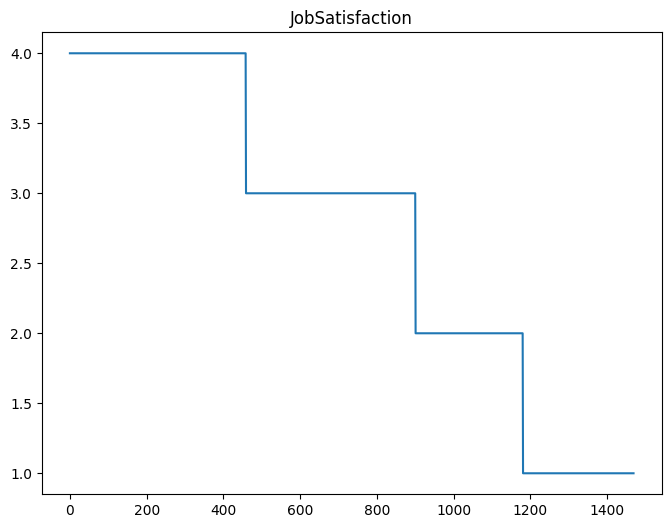

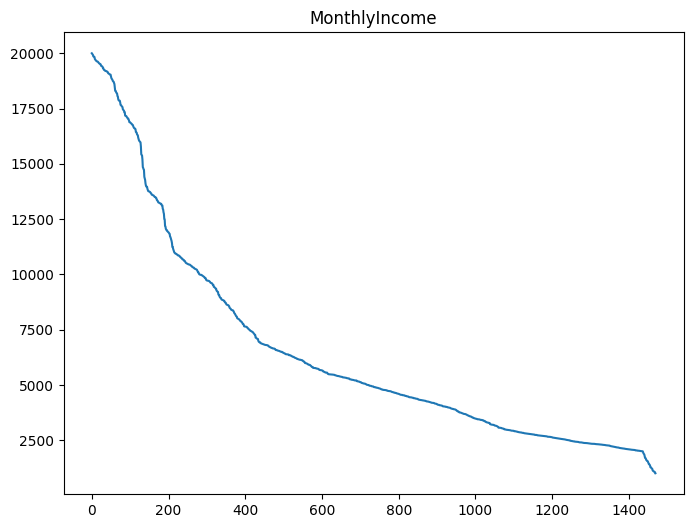

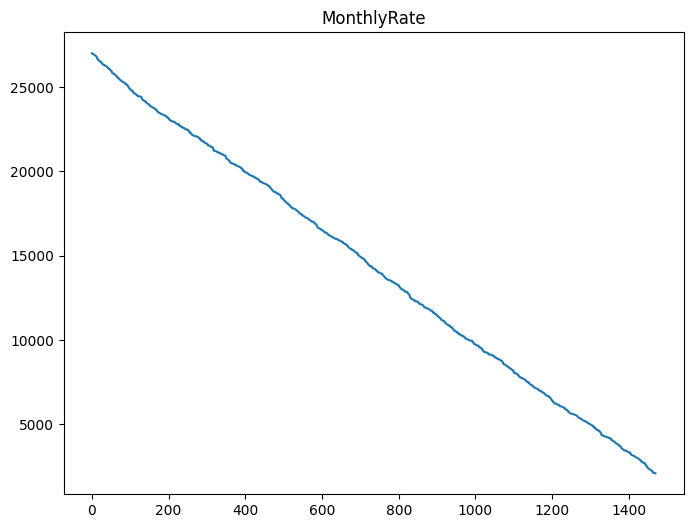

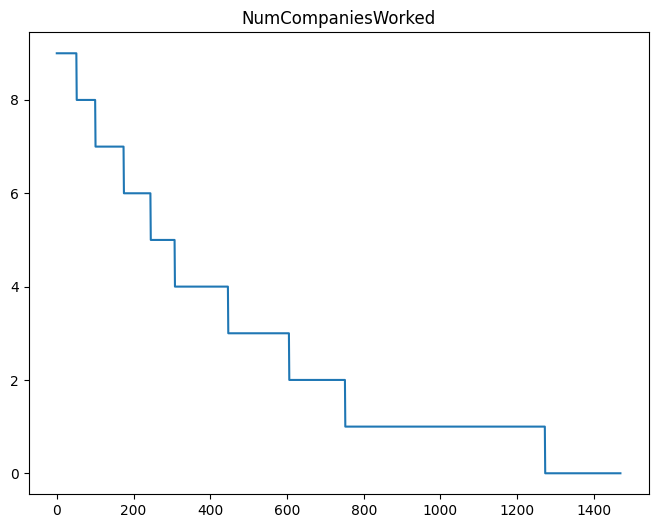

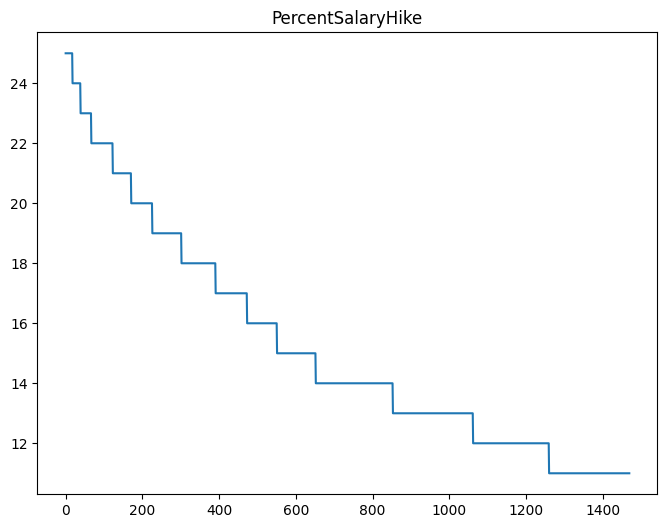

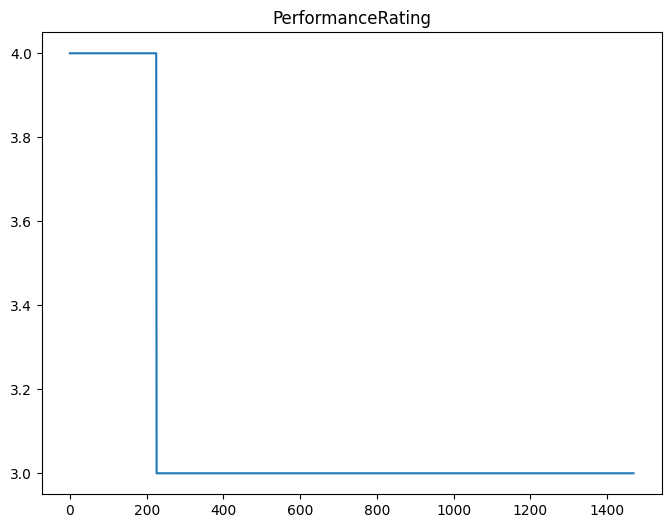

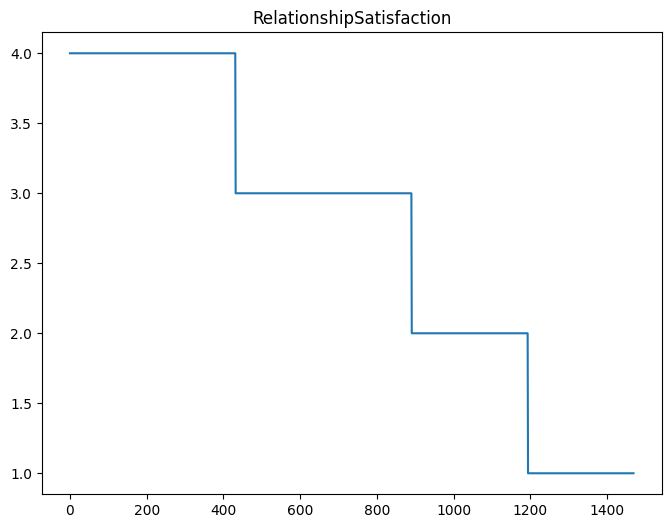

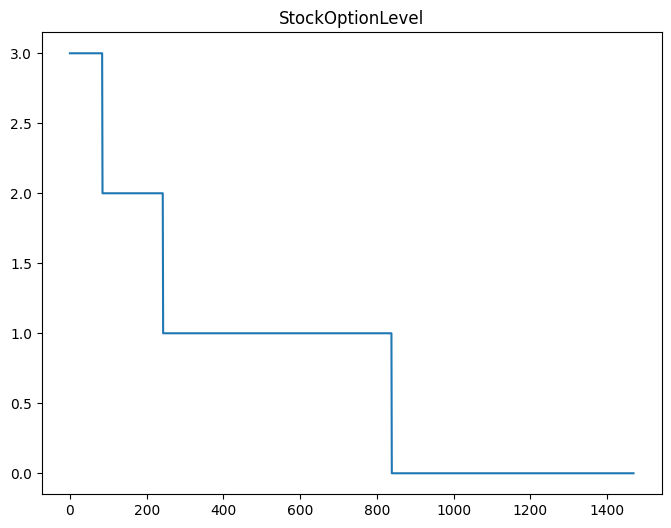

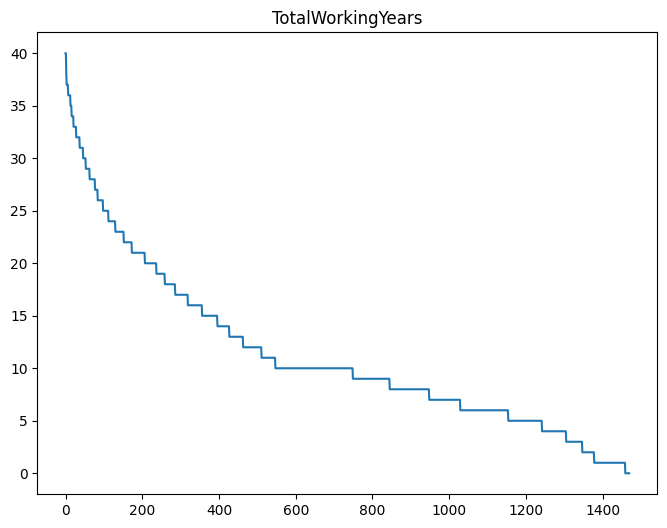

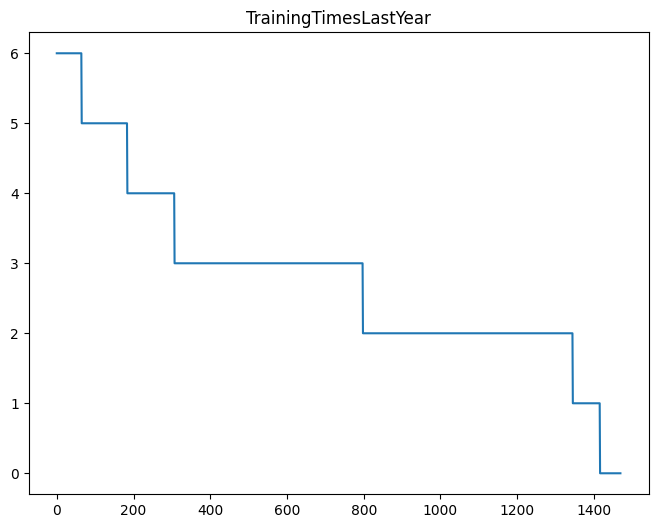

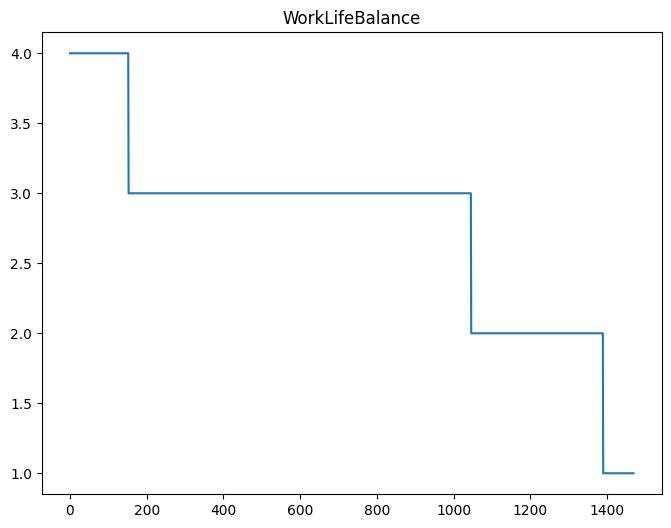

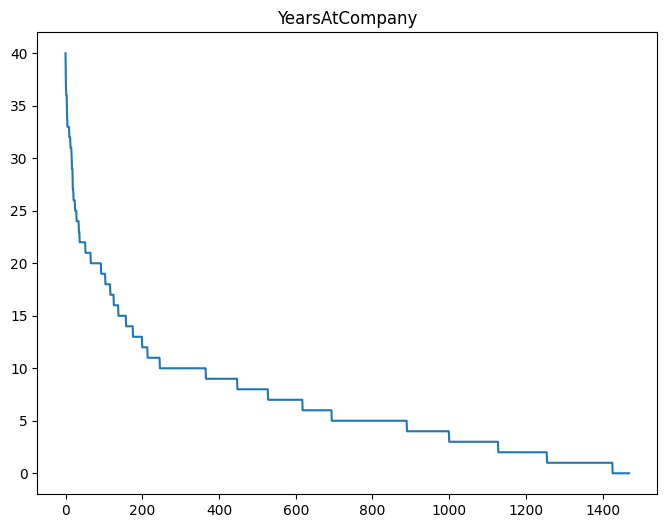

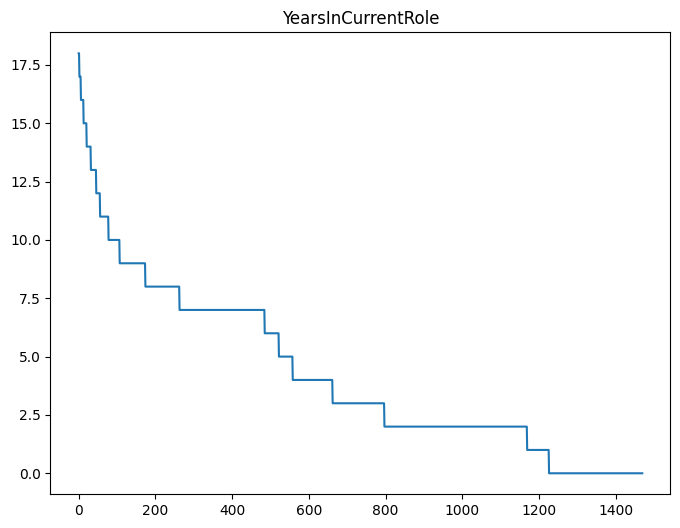

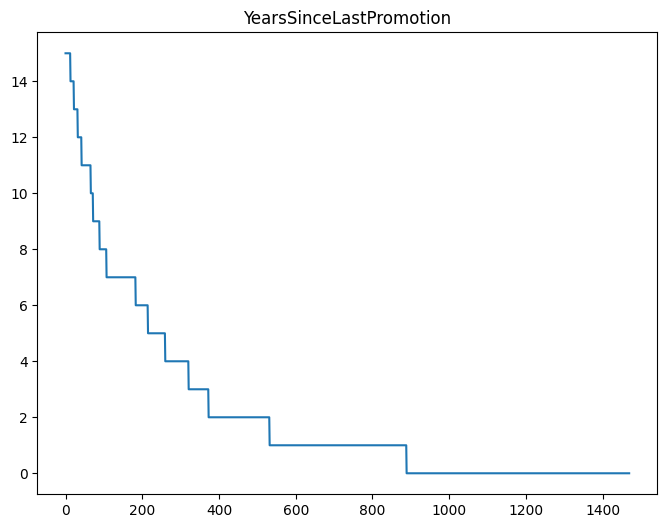

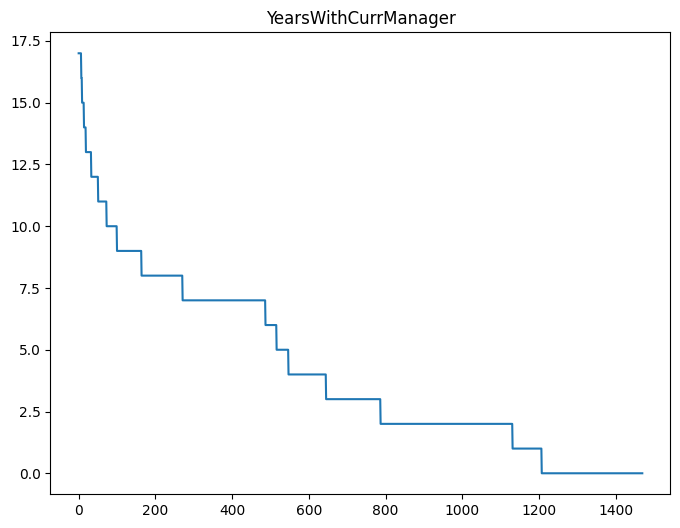

In [112]:
#Numerical columns

cols_num = ['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction','HourlyRate',
        'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
        'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
        'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
        'YearsSinceLastPromotion','YearsWithCurrManager']


for column in cols_num:
  plt.figure(figsize=(8, 6))
  df_ordered=df.sort_values(by=column,ascending=False)
  plt.plot(df_ordered[column].values)
  plt.title(column)
  plt.show()

**4. Business Analytics**

Attrition rate

In [113]:
df.Attrition.value_counts(normalize = True) * 100

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [124]:
#Change Attrition into numerical variable
df['Attrition'] = df.Attrition.map({'No':0, 'Yes':1})

JobRole by Gender

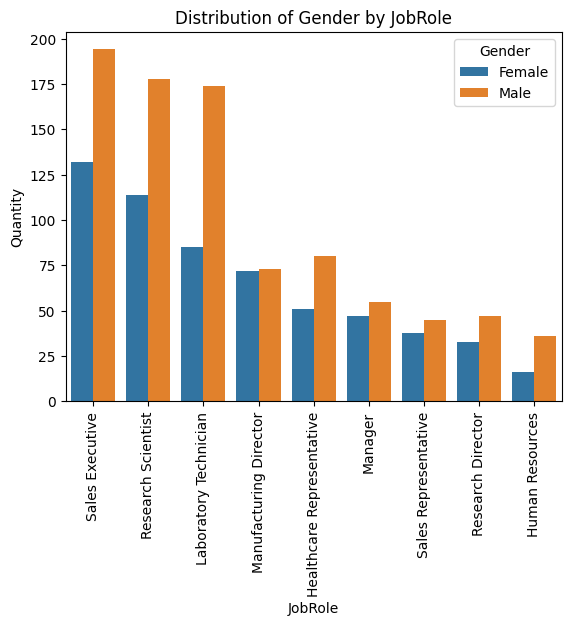

In [47]:
sns.countplot(x='JobRole', hue='Gender', data=df)

plt.title('Distribution of Gender by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Quantity')
plt.xticks(rotation=90)

plt.show()

MonthlyIncome vs Age

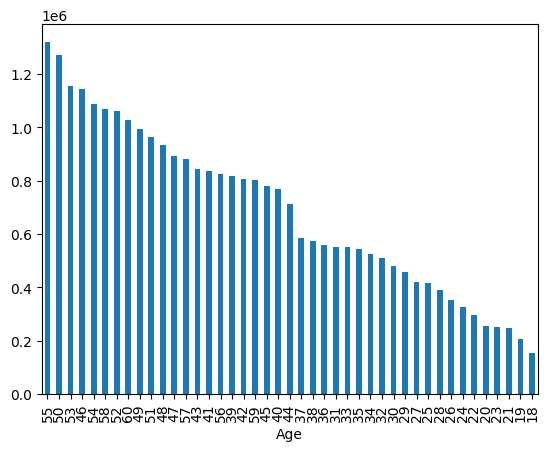

In [52]:
temp = df.groupby('Age').MonthlyIncome.mean().sort_values(ascending = False) * 100
temp.plot.bar();

MonthlyIncome vs Department

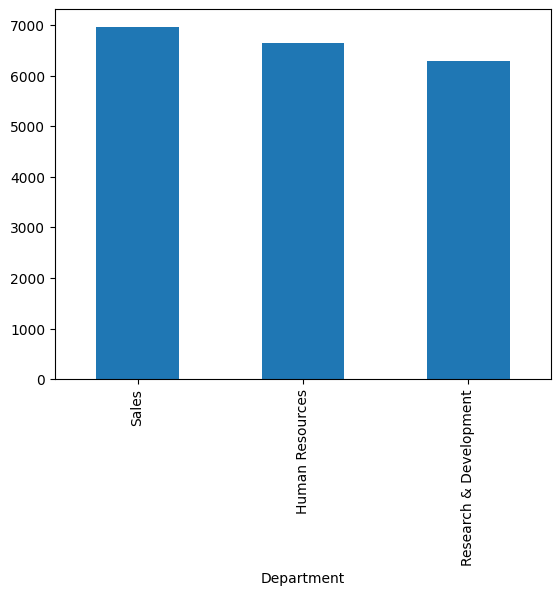

In [56]:
temp = df.groupby('Department').MonthlyIncome.mean().sort_values(ascending = False)
temp.plot.bar();

MonthlyIncome vs JobRole

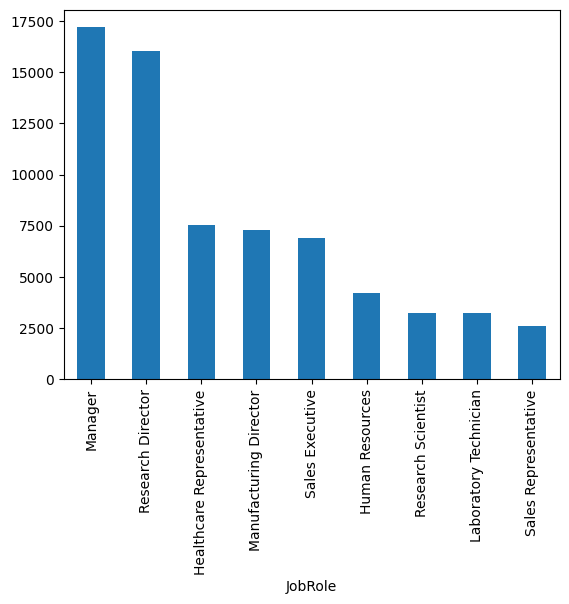

In [57]:
temp = df.groupby('JobRole').MonthlyIncome.mean().sort_values(ascending = False)
temp.plot.bar();

MonthlyRate vs Gender

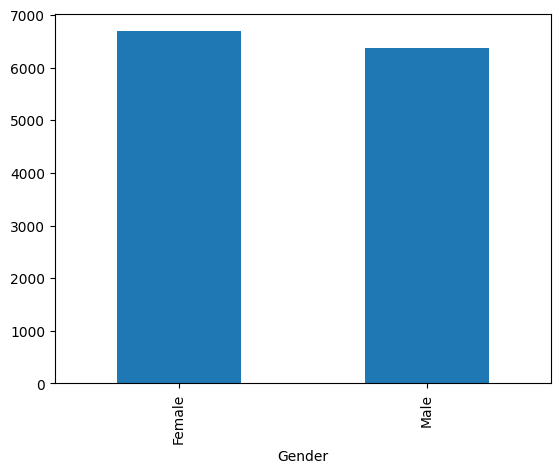

In [58]:
temp = df.groupby('Gender').MonthlyIncome.mean().sort_values(ascending = False)
temp.plot.bar();

MonthlyIncome vs YearsAtCompany

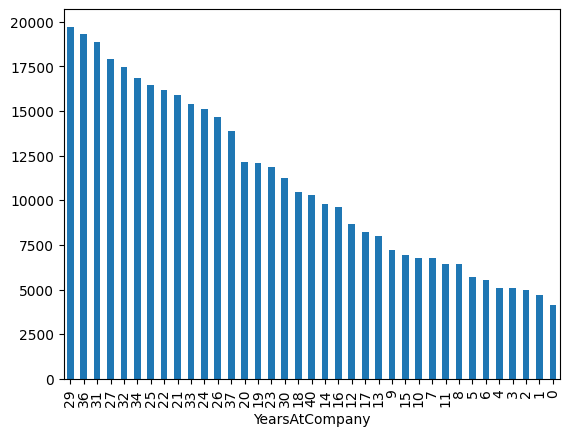

In [59]:
temp = df.groupby('YearsAtCompany').MonthlyIncome.mean().sort_values(ascending = False)
temp.plot.bar();

MonthlyIncome vs JobSatisfaction

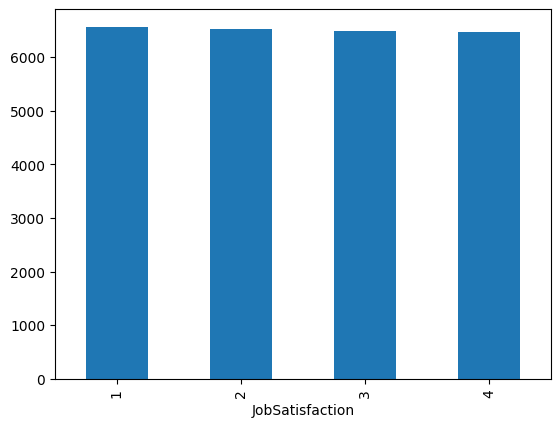

In [60]:
temp = df.groupby('JobSatisfaction').MonthlyIncome.mean().sort_values(ascending = False)
temp.plot.bar();

Relationship of Attrition by Gender

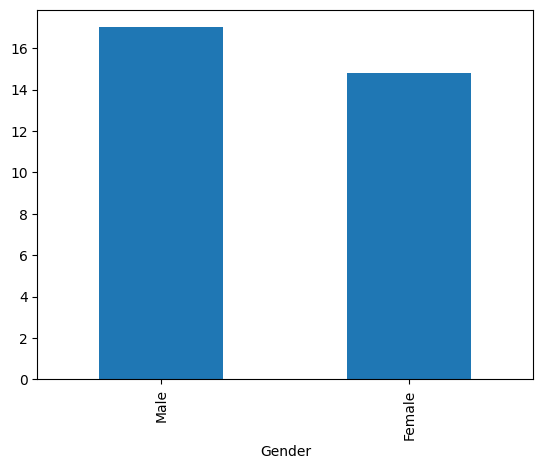

In [54]:
temp = df.groupby('Gender').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by Age

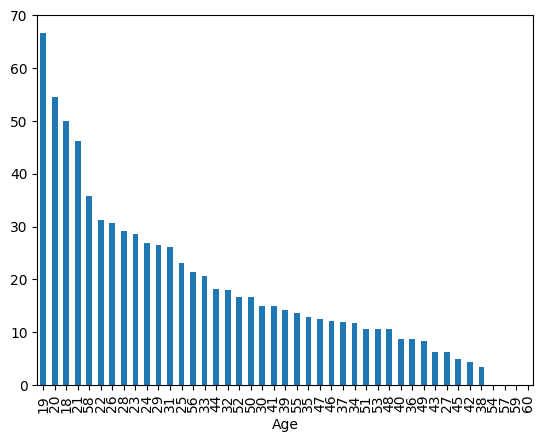

In [61]:
temp = df.groupby('Age').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by Education

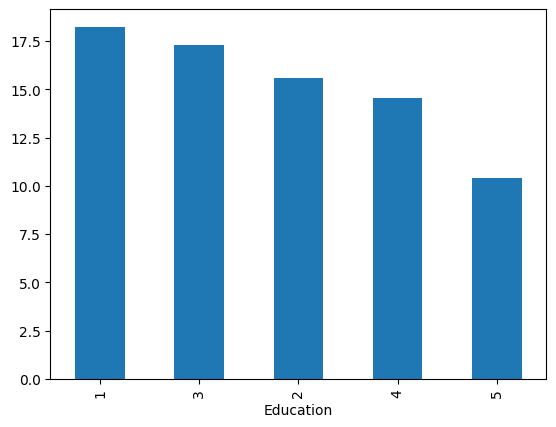

In [63]:
temp = df.groupby('Education').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by MaritalStatus

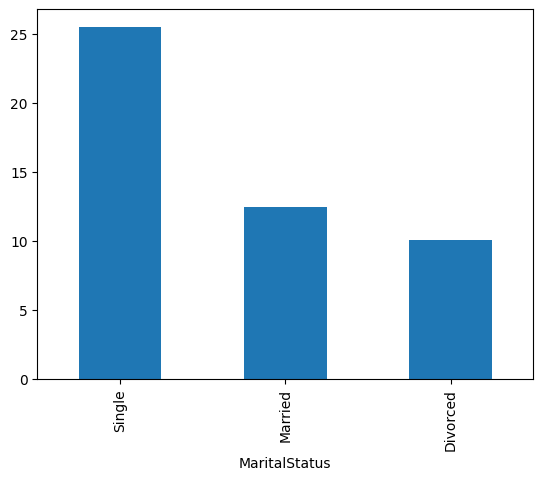

In [64]:
temp = df.groupby('MaritalStatus').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by JobInvolvement

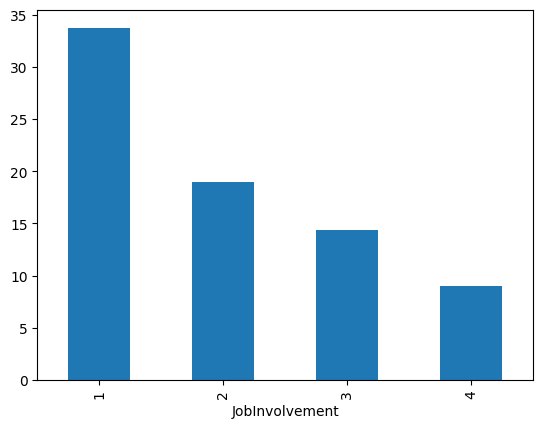

In [65]:
temp = df.groupby('JobInvolvement').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by JobLevel

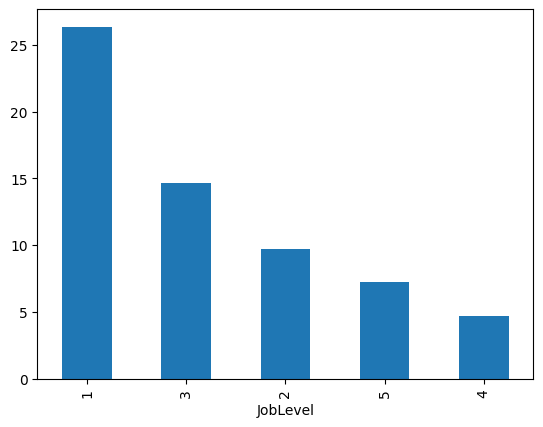

In [66]:
temp = df.groupby('JobLevel').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by NumCompaniesWorked

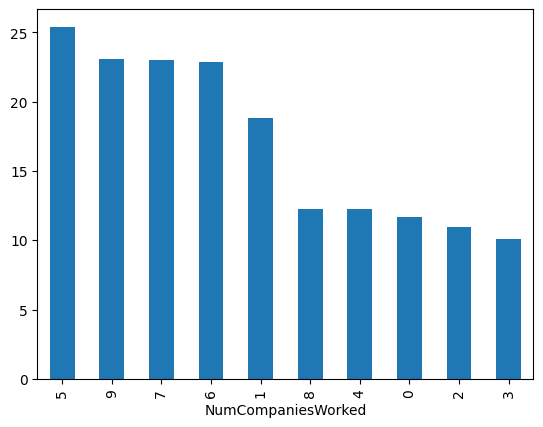

In [69]:
temp = df.groupby('NumCompaniesWorked').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by WorkLifeBalance

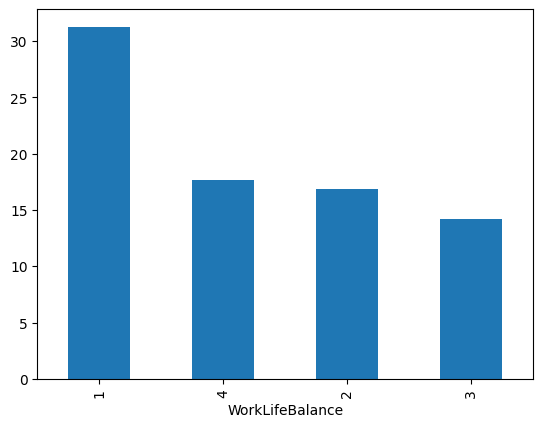

In [70]:
temp = df.groupby('WorkLifeBalance').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by OverTime

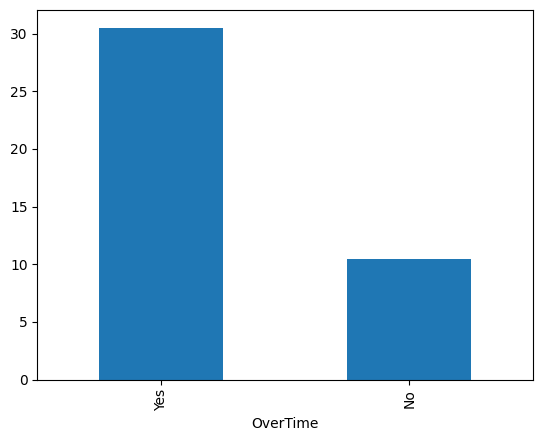

In [71]:
temp = df.groupby('OverTime').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by JobRole

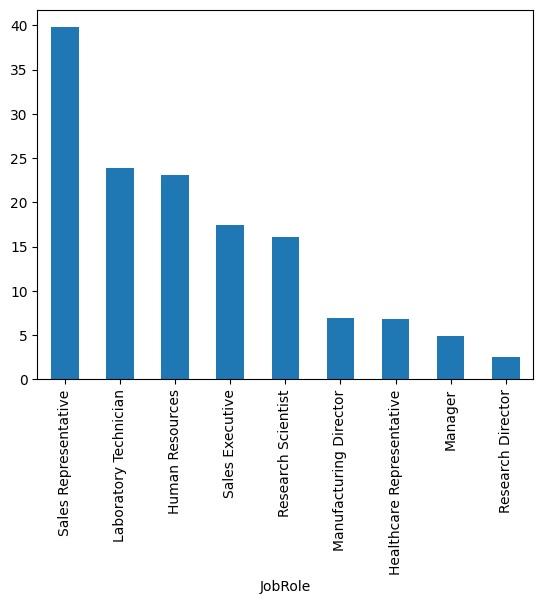

In [91]:
temp = df.groupby('JobRole').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by TotalWorkingYears

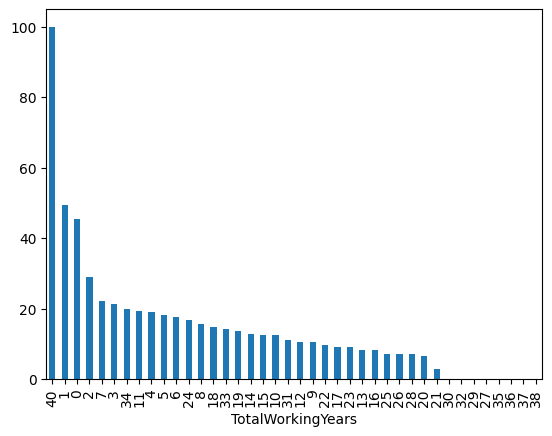

In [72]:
temp = df.groupby('TotalWorkingYears').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Relationship of Attrition by YearsSinceLastPromotion

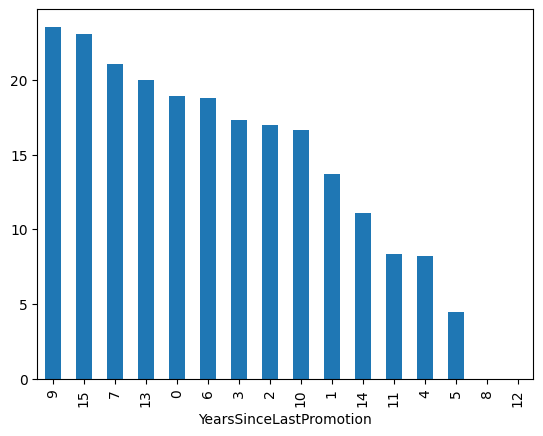

In [73]:
temp = df.groupby('YearsSinceLastPromotion').Attrition.mean().sort_values(ascending = False)*100
temp.plot.bar();

Conclusion:

The average perfil of an employee who leaves the comapny is:


*   Age less than 22 years
*   Low education level
*   Low job involvement
*   Low job level
*   High number of companies worked
*   Low work-life balance
*   Work overtime
*   Work as Sales Representative
*   Single

















**Economic Impact of the Problem**

According to the Center for American Progress' Cost of Turnover study:

*   The cost of turnover for employees earning less than 30,000 is 16.1% of their salary
*   The cost of turnover for employees earning between 30,000-50,000 is 19.7% of their salary
*   The cost of turnover for employees earning between 50,000-75,000 is 20.4% of their salary
*   The cost of turnover for employees earning more than 70,000 is 21% of their salary




-

In [125]:
#For the analysis of the impact, we create a new varibale of the Anual Income for employee

df['AnnualIncome'] = df.MonthlyIncome.transform(lambda x: x*12)
df[['MonthlyIncome','AnnualIncome']]

,MonthlyIncome,AnnualIncome
0,5993,71916
1,5130,61560
2,2090,25080
3,2909,34908
4,3468,41616
...,...,...
1465,2571,30852
1466,9991,119892
1467,6142,73704
1468,5390,64680


In [126]:
#Calculate the economic impact for employee if leaving the company

#Conditions
conditions= [(df['AnnualIncome'] <= 30000),
               (df['AnnualIncome'] > 30000) & (df['AnnualIncome'] <= 50000),
               (df['AnnualIncome'] > 50000) & (df['AnnualIncome'] <= 75000),
               (df['AnnualIncome'] > 75000)]

#Results
results = [df.AnnualIncome * 0.161, df.AnnualIncome * 0.197, df.AnnualIncome * 0.204, df.AnnualIncome * 0.21]

df['TurnoverImpact'] = np.select(conditions,results, default = -999)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AnnualIncome,TurnoverImpact
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,71916,14670.864
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,61560,12558.240
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,25080,4037.880
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,34908,6876.876
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,1,17,3,3,5,2,0,3,30852,6077.844
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,9,5,3,7,7,1,7,119892,25177.320
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,1,6,0,3,6,2,0,3,73704,15035.616
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,0,17,3,2,9,6,0,8,64680,13194.720


Last year impact

In [127]:
total_cost =  df.loc[df.Attrition == 1].TurnoverImpact.sum()
print("Total cost of Turnover of the last year: ", total_cost)

Total cost of Turnover of the last year:  2719005.912


How much does it cost us if employees are not involved?

In [128]:
cost =  df.loc[(df.Attrition == 1)&(df.JobInvolvement==1)].TurnoverImpact.sum()
print("Total cost of Turnover for low Job Involvement in the last year: ", cost)

Total cost of Turnover for low Job Involvement in the last year:  368672.688


How much does it cost us if employees have a low work-life balance?

In [129]:
cost =  df.loc[(df.Attrition == 1)&(df.WorkLifeBalance==1)].TurnoverImpact.sum()
print("Total cost of Turnover for low Work-life Balance in the last year: ", cost)

Total cost of Turnover for low Work-life Balance in the last year:  242995.212


Savings

In [130]:
print(f"Reducing employee turnover by 10% would save us {int(total_cost * 0.1)} each year.")
print(f"Reducing employee turnover by 20% would save us {int(total_cost * 0.2)} each year.")
print(f"Reducing employee turnover by 30% would save us {int(total_cost * 0.3)} each year.")

Reducing employee turnover by 10% would save us 271900 each year.
Reducing employee turnover by 20% would save us 543801 each year.
Reducing employee turnover by 30% would save us 815701 each year.


And we can continue to draw up strategies associated with the insights of abandonment:

We had seen that sales representatives are the position that leaves the most.

Would it make sense to make a specific plan for them?

What would be the cost saved if we reduced the loss by 30%?

In [131]:
#Percentage of sales representative thet left in the past
total_rep_past = len(df.loc[df.JobRole == 'Sales Representative'])
turnover_rep_past = len(df.loc[(df.JobRole == 'Sales Representative') & (df.Attrition == 1)])
percentage_past = turnover_rep_past/total_rep_past

percentage_past

0.39759036144578314

In [132]:
total_rep_current = len(df.loc[(df.JobRole == 'Sales Representative') & (df.Attrition == 0)])
leaving = int(total_rep_current*percentage_past)

leaving

19

How many can we retain (hypothesis 30%) and how much money can it mean?

In [133]:
retain = int(leaving * 0.3)
savings = df.loc[(df.JobRole == 'Sales Representative') & (df.Attrition == 0),'TurnoverImpact'].sum() * percentage_past * 0.3

print(f'If we retain {retain} Sales Representatives, we can save {savings}.')

If we retain 5 Sales Representatives, we can save 37447.22424578312.


**4. ML Model**

In [135]:
#Create a copy of the model to use it in ML
df_ml=df.copy()

In [139]:
#Transform all the categorical variables to numeric variables

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe.head(20)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [140]:
#Select numerical columns
num = df.select_dtypes('number').reset_index(drop = True)


In [143]:
#Unify to create dataframe
df_ml = pd.concat([cat_ohe,num], axis = 1)
print(df_ml.head(3))

   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0               

In [146]:
#Separate between predictors and target

X = df_ml.drop(columns='Attrition')
Y = df_ml['Attrition']

In [159]:
#Create sets for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [160]:
#Model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
#Prediction
Y_pred = model.predict(X_test)

In [162]:
#Acccuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.8673469387755102


In [169]:
#Comparing real values with predictions
Y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Real Values': Y_test, 'Predicted Values': Y_pred})
print(comparison.head(25))

      Real Values  Predicted Values
1041            0                 0
184             0                 0
1222            1                 1
67              0                 0
220             0                 0
494             0                 0
430             0                 0
240             0                 0
218             0                 0
49              0                 0
665             0                 0
926             0                 0
617             0                 0
361             0                 0
1423            0                 0
1244            0                 0
1250            0                 0
752             1                 0
271             1                 0
1055            0                 0
259             1                 0
428             0                 0
1026            0                 0
277             0                 0
1105            0                 0
